# Fraud Detection Project
This notebook demonstrates a basic end-to-end pipeline for fraud detection using a credit card transaction dataset. We will cover:
- Anomaly Detection
- Machine Learning Models (Logistic Regression, Decision Trees, Neural Networks)
- Feature Engineering
- Real-time Monitoring (Simulation)
- Scalability Considerations

In [1]:
!pip install -q scikit-learn imbalanced-learn matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

## 1. Load the Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Anomaly Detection & Data Exploration

Class
0    284315
1       492
Name: count, dtype: int64


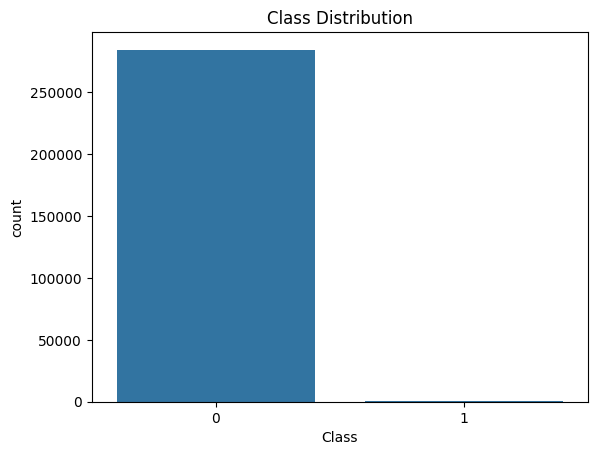

In [3]:
print(df['Class'].value_counts())
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.show()

## 3. Feature Engineering and Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Apply StandardScaler to 'Amount' before dropping the column
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

# Drop 'Time' and the original 'Amount' column
df = df.drop(['Time', 'Amount'], axis=1)

# Drop rows with NaN in the 'Class' column
df = df.dropna(subset=['Class'])

X = df.drop('Class', axis=1)
y = df['Class']

X_res, y_res = SMOTE().fit_resample(X, y)

## 4. Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

## 5. Model Training & Evaluation

In [6]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier(max_iter=300)
}

for name, model in models.items():
    print(f"\n{name} Results:")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))


Logistic Regression Results:
[[83014  2135]
 [ 7099 78341]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85149
           1       0.97      0.92      0.94     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589


Decision Tree Results:
[[84902   247]
 [   98 85342]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Neural Network Results:
[[85103    46]
 [   20 85420]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accura

## 6. Real-time Monitoring Simulation

In [7]:
import random
for i in range(5):
    index = random.randint(0, len(X_test) - 1)
    sample = X_test.iloc[index:index+1]
    prediction = models['Logistic Regression'].predict(sample)
    print(f"Transaction {i+1}: Fraud" if prediction[0] else f"Transaction {i+1}: Legitimate")

Transaction 1: Fraud
Transaction 2: Legitimate
Transaction 3: Legitimate
Transaction 4: Legitimate
Transaction 5: Fraud


## 7. Scalability Considerations
- Use distributed systems like Apache Kafka + Spark for real-time streams.
- Model deployment using Docker and REST APIs.
- Cloud services (AWS/GCP/Azure) for elastic scaling.